## Неявный метод простых итераций на основе сингулярного разложения

### Пример 
Рассмотрим МНК задачу вида

\begin{equation}
\label{eq1}\tag{1}
y = A\cdot u.
\end{equation}
Пусть
$$
A = \dfrac{1}{2}\left(
    \begin{array}{cc}
    1 & 1\\
    1+10^{-8} & 1 - 10^{-8}
    \end{array}
\right),\; 
y = \left(
    \begin{array}{c}
    1\\
    1
    \end{array}
\right).
$$

Максимальное и минимальное сингулярные значения матрицы $A$ задачи \eqref{eq1} соответственно равны $\sigma_{max} = 1$ и $\sigma_{min} =5 \cdot 10^{−9} $, а спектральное
число обусловленности задачи $\kappa_2 = \frac{\sigma_{max}}{\sigma_{min}} = 2 \cdot 10^8$. Таким образом, рассматривая задача относится к плохо обусловленным вычислительным задачам.

Вектор точного решения, полученный с помощью системы нормальных уравнений равен:
$
u_{ls} = \left(A^\top A\right)^{-1}A^\top y = \left(\begin{array}{c}
    1\\
    1
    \end{array}
    \right).
$

Рассмотрим задачу \eqref{eq1} с небольшим возмущением в векторе правой части:
\begin{equation}
\label{eq2}\tag{2}
\tilde{y} = A\cdot u,
\end{equation}
где $\tilde{y} = y  + \left(
    \begin{array}{c}
    0.01\\
    0
    \end{array}
    \right)$.

Решая систему \eqref{eq2} с помощью системы нормальных уравнений получим $ u^{*}_{ls} = \left(A^\top A\right)^{-1}A^\top \tilde{y} = \left(\begin{array}{c}
    1.01 \cdot 10^{−6}\\
    1.01 \cdot 10^6
    \end{array}
    \right)$.

Рассматриваемый пример наглядно демонстрирует влияние плохой обусловленности задачи – даже небольшое возмущение вектора правой части может привести к значительному изменению решения, полученного путем решения системы нормальных уравнений.
#### Усеченое сингулярное разложение
Авторы работы [80] для решения возмущенной задачи \eqref{eq2} предлагают использовать усеченное сингулярное разложение.

Параметр усечения $tol = 1 \cdot 10^{−7}$, решение равно $u_{tsvd} = \left(\begin{array}{c}
    1.0050\\
    1.0049
    \end{array}
    \right)$.

К недостатком использования усеченного сингулярного разложения для решения плохо обусловленных задач можно отнести следующее: отсут-
ствие методики выбора параметра усечения, в случае матрицы не полного ранга, необходимо сначала вычислить ранг матрицы и уже затем решать
задачу. На практике, доступной информацией о задаче чаще всего является информация о возмущении в векторе правой части.

### Неявный метод простых итераций на основе сингулярного разложения
Вычислим решение возмущенной задачи \eqref{eq2}  с помощью регуляриванного итерационного алгоритма на основе сингулярного разложения.
Параметр $\delta = 0.01$, параметр $\omega =\sqrt{\alpha}=\sigma_{max},\; \dfrac{\sigma_{max}}{2},\; \dfrac{\sigma_{max}}{5},\; \dfrac{\sigma_{max}}{10}$.

Результаты расчетов представлены в таблице.

<table style="width:50%" align="center" border="2">
<thead>
    <tr>
        <th> $\omega$ </th>
        <th> Число итераций</th>
        <th> $\frac{\left\Vert u-u_k\right\Vert}{\left\Vert u\right\Vert}$</th>
        <th> $u_k$ </th>
    </tr>
</thead>
<tbody>
    <tr>
        <td> $\sigma_{max}=1$ </td>
        <td> $8$ </td>
        <td> $1.07\cdot 10^{-3}$</td>
        <td> $\left(1.0011,\; 1.0011\right)^\top$ </td>
    </tr>
    <tr>
        <td> $\frac{\sigma_{max}}{2}=0.5$</td>
        <td> $4$ </td>
        <td> $3.39\cdot 10^{-3}$</td>
        <td> $\left(1.0033,\; 1.0033\right)^\top$ </td>
    </tr>
    <tr>
        <td> $\frac{\sigma_{max}}{5}=0.2$</td>
        <td> $2$ </td>
        <td> $3.51\cdot 10^{-3}$</td>
        <td> $\left(1.0035,\; 1.0035\right)^\top$ </td>
    </tr>
    <tr>
        <td> $\frac{\sigma_{max}}{10}=0.1$</td>
        <td> $2$ </td>
        <td> $4.09\cdot 10^{-3}$</td>
        <td> $\left(1.0049,\; 1.0049\right)^\top$ </td>
    </tr>
</tbody>
</table>

Результаты вычислений позволяют сделать вывод, что предложенный метод по точности не уступает методам
 основанным на сингулярном разложении, но за счет варьирования параметров позволяет получать более точные решения.


In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [14]:
def tsvd(u, s, v, b, tol):
    """
     Усеченое сингулярное разложение (tsvd) (для примера)
    """
    n, p = v.shape
    s = s.reshape(n, 1)
    x_k = np.zeros((n,1))
    k = s[s>tol].shape[0]
    beta = u[:,0:p].T@b
    xi = beta/s
    x_k = v[:,0:k]@xi[0:k]
    return x_k, k

In [25]:
def risimsvd(u, s, vh, f, omega, delta, tau = 1.01):
    """
    Регуляризованный вариант неявного метода простых итераций на основе сингулярного разложения.
    :param u: левые сингулярные векторы
    :param s: сингулярные числа
    :param vh: правые сингулярные векторы
    :param f: вектор правой части
    :param omega:
    :param delta: невязка || f - \filde{f}||
    :return: вектор решения, число итераций, вектор невязки на каждой итерации
    """
    rdelta = []
    n = s.shape[0]
    n1 = vh.shape[1]
    s = s.reshape(n, 1)
    alpha = omega ** 2
    s2 = s ** 2 + alpha
    g_alpha = vh[:, 0:n1].T @ np.divide(np.multiply(s, u[:, 0:n].T @ f), s2)
    phi_alpha = vh[:, 0:n1].T @ np.divide(vh[:, 0:n1], s2)
    theta = np.zeros((vh.shape[1], 1))
    ee = s * np.eye(n)
    it = 0
    err = 1e+10
    while err >= tau*delta:
        theta = alpha * phi_alpha @ theta + g_alpha
        it = it + 1
        err = LA.norm((u @ (ee @ vh)) @ theta - f)
        rdelta = np.append(rdelta, err)
    return theta.reshape(n1, 1), it, rdelta

In [5]:
A = 0.5*np.array([[1.0, 1+1e-08], [1.0, 1-10e-08]])
f = np.array([[1.0], [1.0]])
u_ext = np.array([[1.0], [1.0]])
f[0,0] = f[0,0]+0.01

#### Усеченое сингулярное разложение

In [62]:
u, s, vh = LA.svd(A, full_matrices = False)
tol = 1e-07
u_tsvd, k = tsvd(u, s, vh.T, f, tol)
tsvd_err = LA.norm(u_ext - u_tsvd)/LA.norm(u_ext)
print('Относительная ошибка %.2e ' % tsvd_err)

Относительная ошибка 5.00e-03 


### Неявный метод простых итераций на основе сингулярного разложения

Относительная ошибка 1.07e-03 
Относительная ошибка 3.39e-03 
Относительная ошибка 3.51e-03 
Относительная ошибка 4.90e-03 


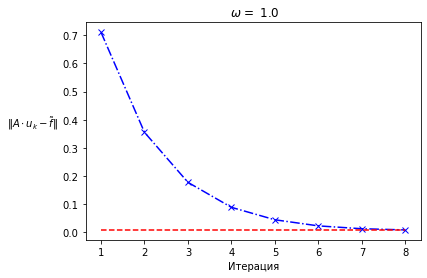

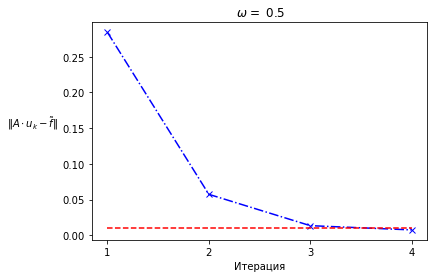

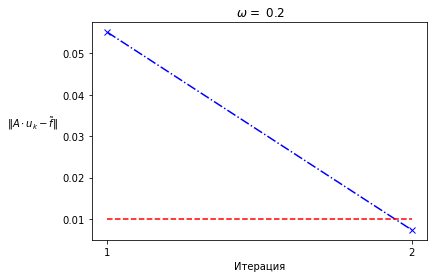

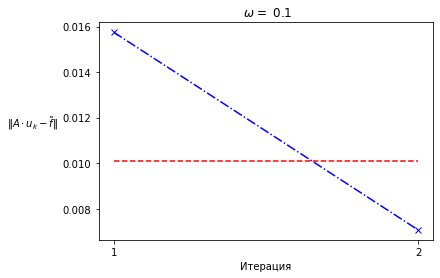

In [65]:
delta = 0.01
u,s,vh = LA.svd(A,full_matrices = False)
tau = 1.01
k = np.array([1, 2, 5, 10]);
err = np.zeros([k.shape[0]])
uk = np.zeros([u_ext.shape[0],k.shape[0]])
for i in range(k.shape[0]):
    omega = s[0]/k[i]
    theta, it, rdelta = risimsvd(u, s, vh, f, omega, delta)
    err[i] = LA.norm(u_ext - theta)/LA.norm(u_ext)
    uk[:,i] = theta.reshape([1,u_ext.shape[0]])
    gd = np.zeros([it])
    td = np.zeros([it])
    gd[:] = delta
    td[:] = tau*delta
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.ylabel('$\\left\\Vert A\cdot u_k - \\tilde{f}\\right\\Vert$', rotation=0,labelpad=30)
    plt.xlabel('Итерация')
    plt.title(" $\\omega = $ " + str(float("{0:.4f}".format(omega))))
    ax.plot(range(1,it+1),rdelta,'bx-.',range(1,it+1),td,'r--')
    print('Относительная ошибка %.2e ' % err[i])